In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies_data=pd.read_csv("movies.csv")
rating_data=pd.read_csv("ratings.csv")
subscription=pd.read_csv("subscriptions.csv")
users=pd.read_csv("users.csv")
watch_history=pd.read_csv("watch_history.csv")

In [3]:
users.columns

Index(['user_id', 'name', 'email', 'age', 'country', 'date'], dtype='object')

In [4]:
users.shape

(2051, 6)

In [5]:
movies_data.columns

Index(['movie_id', 'title', 'release_year', 'runtime', 'genre'], dtype='object')

In [6]:
movies_data.shape

(4229, 5)

In [7]:
watch_history.columns

Index(['watch_id', 'user_id', 'movie_id', 'watch_date', 'watch_duration',
       'device_type'],
      dtype='object')

In [8]:
watch_history.shape

(98923, 6)

In [9]:
subscription.columns

Index(['payment_id', 'user_id', 'amount', 'payment_date', 'plan_type',
       'valid_until', 'churn_status', 'renewed'],
      dtype='object')

In [10]:
subscription.shape

(4389, 8)

In [11]:
merged_df = watch_history.merge(users, on='user_id').merge(movies_data, on='movie_id')

In [12]:
merged_df = merged_df.dropna()

In [13]:
merged_df.shape

(99756, 15)

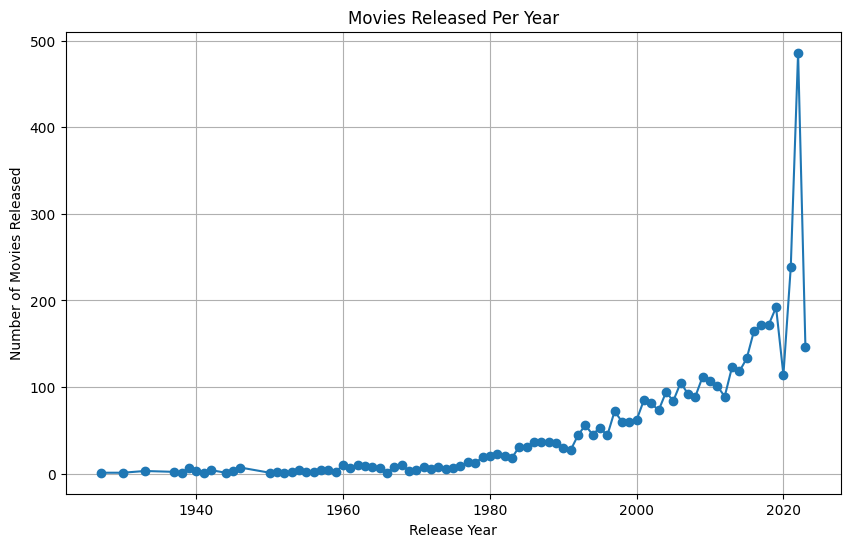

In [14]:
import matplotlib.pyplot as plt

# Step 1: Group and count
movies_per_year = movies_data.groupby('release_year')['movie_id'].count()

# Step 2: Plot
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')  # Line plot with markers
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.title('Movies Released Per Year')
plt.grid(True)
plt.show()


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

X = movies_per_year.index.values.reshape(-1, 1)
y = movies_per_year.values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

future_year = poly.transform([[2050]])
prediction = model.predict(future_year)
print(f"Predicted movies in 2050: {int(prediction[0])}")

Predicted movies in 2050: 409


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Prepare data
X = movies_per_year.index.values.reshape(-1, 1)
y = movies_per_year.values

poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

score = r2_score(y, y_pred)
print(f"R² Score: {score:.4f}")

R² Score: 0.7460
